In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
#map() is used to map benign into 0 and malignant into 1
df['diagnosis'].map({'B':0,'M':1})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

In [13]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

c:\Users\unni\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
classifier.score(X_train,y_train)

0.9553805774278216

In [18]:
classifier.score(X_test,y_test)

0.9627659574468085

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[118,   3],
       [  4,  63]], dtype=int64)

In [21]:
#SMOTE for data imbalalcing

# ! pip install imbalanced-learn

In [22]:
rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)
train_score = rnd.score(X_train, y_train)
print(f'Train Accuracy for {rnd.__class__.__name__} is {train_score}')  
test_score = rnd.score(X_test, y_test)
print(f'Test Accuracy for {rnd.__class__.__name__} is {test_score}')

Train Accuracy for RandomForestClassifier is 1.0
Test Accuracy for RandomForestClassifier is 0.9574468085106383


In [23]:
rnd.feature_importances_

array([0.04053567, 0.01571708, 0.05560456, 0.06328858, 0.0087589 ,
       0.0091634 , 0.06016147, 0.11221882, 0.00406945, 0.00262525,
       0.02085507, 0.00309862, 0.018938  , 0.01495428, 0.00507458,
       0.00394432, 0.01006751, 0.00312291, 0.00496773, 0.00469039,
       0.06596225, 0.02159103, 0.12562248, 0.09722578, 0.01534828,
       0.01568653, 0.04333659, 0.1362975 , 0.01217263, 0.00490033])

In [24]:
rnd.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [25]:
feature_imp = pd.Series(rnd.feature_importances_, index=rnd.feature_names_in_).sort_values(ascending = False)

In [26]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\unni\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


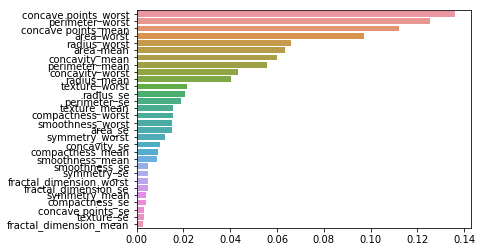

In [27]:
import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)

plt.show()

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm = SMOTE(random_state=42)

In [30]:
X_res,y_res = sm.fit_resample(X_train,y_train)

In [31]:
y_train.value_counts()

0    236
1    145
Name: diagnosis, dtype: int64

In [32]:
y_res.value_counts()

1    236
0    236
Name: diagnosis, dtype: int64

In [33]:
classifier.score(X_train,y_train)

0.9553805774278216

In [34]:
classifier.score(X_test, y_test)

0.9627659574468085

In [35]:
classifier_res = LogisticRegression()
classifier_res.fit(X_res,y_res)

c:\Users\unni\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
X_res.shape

(472, 30)

In [37]:
y_res.shape

(472,)

In [38]:
y_pred = classifier_res.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[115,   6],
       [  4,  63]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       121
           1       0.91      0.94      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

train_score =ada.score(X_train, y_train)
test_score =ada.score(X_test, y_test)

print(f'The Train score for ada is {train_score}')
print(f'The Test score for ada is {test_score}')

The Train score for ada is 1.0
The Test score for ada is 0.9521276595744681


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

train_score =gb.score(X_train, y_train)
test_score =gb.score(X_test, y_test)

print(f'The Train score for gb is {train_score}')
print(f'The Test score for gb is {test_score}')

The Train score for gb is 1.0
The Test score for gb is 0.9574468085106383


In [44]:
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,max_features=5)
gb.fit(X_train, y_train)

train_score =gb.score(X_train, y_train)
test_score =gb.score(X_test, y_test)

print(f'The Train score for gb is {train_score}')
print(f'The Test score for gb is {test_score}')

The Train score for gb is 1.0
The Test score for gb is 0.9574468085106383


In [45]:
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=5)
gb.fit(X_train, y_train)

train_score =gb.score(X_train, y_train)
test_score =gb.score(X_test, y_test)

print(f'The Train score for gb is {train_score}')
print(f'The Test score for gb is {test_score}')

The Train score for gb is 1.0
The Test score for gb is 0.9680851063829787
